In [4]:
import pandas as pd

In [6]:
# Load the dataset
pitcher_data = pd.read_csv("PitcherData.csv")

# Display the first few rows to understand the data structure and to identify outings
pitcher_data.head()


,GameId,Role,PitcherHandedness,Delivery,ReleaseSpeed,ZoneSpeed,PitchVerticalApproachAngle,ReleaseExtension,ReleaseHeight,ReleaseSide,...,TimeHandSeparation,TimePeakKneeLift,TimeFootPlant,TimeMER,PitchType,SpinRate,SpinDirection,InducedVertBreak,SpinEfficiency,PitchCount
0,717247,Pitcher,R,WU,92.883598,85.358162,-5.26402,7.200283,5.68847,-1.32301,...,-0.498392,-0.841697,-0.151755,-0.031765,FB,2010.934814,198.274002,15.237906,0.981800,1
1,716775,Pitcher,R,WU,92.162498,82.678711,-5.50739,7.074602,5.78597,-1.85525,...,-0.532028,-0.802006,-0.155392,-0.035402,FB,1991.656250,186.020004,18.172521,0.969281,1
2,716858,Pitcher,R,WU,82.715797,76.270004,-6.89922,6.584419,5.63218,-2.29365,...,-0.523564,-0.773540,-0.086937,-0.036942,NaN,2211.644287,134.322998,9.893006,0.381183,1
3,717247,Pitcher,R,WU,83.119797,75.655327,-5.24281,6.893004,5.59272,-1.73077,...,-0.498408,-0.821712,-0.078445,-0.035115,SL,2233.343750,122.036003,9.656799,0.366566,2
4,716775,Pitcher,R,WU,82.492897,74.397636,-7.73599,6.785694,5.60639,-2.27405,...,-0.535145,-0.781763,-0.145221,-0.038574,SL,2300.342041,114.580002,7.594166,0.465045,2


In [11]:
# Get unique values in each column
unique_values = {column: pitcher_data[column].nunique() for column in pitcher_data.columns}
unique_values

{'GameId': 7,
 'Role': 1,
 'PitcherHandedness': 1,
 'Delivery': 2,
 'ReleaseSpeed': 301,
 'ZoneSpeed': 301,
 'PitchVerticalApproachAngle': 301,
 'ReleaseExtension': 298,
 'ReleaseHeight': 301,
 'ReleaseSide': 301,
 'ArmAngleBR': 301,
 'ArmSlotBR': 301,
 'StrideLength': 301,
 'StrideLengthPercentHeight': 301,
 'StrideWidth': 301,
 'TimeToPlate': 301,
 'PeakHipsVeloX': 301,
 'PeakPitchHandVeloX': 301,
 'DLHipRotMin': 301,
 'HSSepMin': 301,
 'PARotMax': 301,
 'PAScapRetMin': 301,
 'SLKneeFlexFP': 301,
 'PAElbowFlexBR': 301,
 'SLKneeFlexBR': 301,
 'TorsoFBBR': 301,
 'TorsoSBBR': 301,
 'PeakMomDL': 298,
 'PeakMomSL': 301,
 'PeakMomTorso': 301,
 'PeakMomLFA': 301,
 'PeakMomLUA': 301,
 'PeakMomPFA': 301,
 'PeakMomPUA': 301,
 'PeakMomTotalBody': 301,
 'PeakMomTimeDL': 301,
 'PeakMomTimeSL': 298,
 'PeakMomTimeTorso': 298,
 'PeakMomTimeLFA': 301,
 'PeakMomTimeLUA': 301,
 'PeakMomTimePFA': 301,
 'PeakMomTimePUA': 301,
 'PeakMomTimeTotalBody': 301,
 'PeakPelvisRotVelo': 301,
 'PeakPelvisRotVeloTim

The dataset "PitcherData.csv" has been successfully loaded. It contains several columns, including GameId (**assuming GameId represents an outing**), ReleaseSpeed, and PitchType. The ReleaseSpeed is likely to be the fastball velocity that the coach is interested in. Since the coach is concerned about the variance in fastball velocities, I will
1: Filter the data for pitches where PitchType is **'FB'** to focus on fastballs.
2: Calculate the variance in ReleaseSpeed for each outing.
3: Explore the biomechanical metrics for any patterns or anomalies that may correlate with changes in ReleaseSpeed.

In [12]:
# Filtering the dataset for fastballs only
fastballs_only = pitcher_data[pitcher_data['PitchType'] == 'FB']
fastballs_only.head()  # Displaying the first 5 rows of the filtered dataset

,GameId,Role,PitcherHandedness,Delivery,ReleaseSpeed,ZoneSpeed,PitchVerticalApproachAngle,ReleaseExtension,ReleaseHeight,ReleaseSide,...,TimeHandSeparation,TimePeakKneeLift,TimeFootPlant,TimeMER,PitchType,SpinRate,SpinDirection,InducedVertBreak,SpinEfficiency,PitchCount
0,717247,Pitcher,R,WU,92.883598,85.358162,-5.26402,7.200283,5.68847,-1.32301,...,-0.498392,-0.841697,-0.151755,-0.031765,FB,2010.934814,198.274002,15.237906,0.981800,1
1,716775,Pitcher,R,WU,92.162498,82.678711,-5.50739,7.074602,5.78597,-1.85525,...,-0.532028,-0.802006,-0.155392,-0.035402,FB,1991.656250,186.020004,18.172521,0.969281,1
8,717299,Pitcher,R,WU,91.378700,83.668266,-3.70165,6.875530,5.66476,-1.37897,...,-0.509092,-0.835731,-0.135790,-0.035798,FB,2106.927734,200.289993,18.239483,0.967735,1
9,717442,Pitcher,R,WU,94.797997,86.015198,-4.85433,7.120858,5.65724,-1.32767,...,-0.482495,-0.809133,-0.089198,-0.032536,FB,2181.846680,192.001999,15.462215,0.946546,1
10,717299,Pitcher,R,WU,91.773499,84.278610,-5.13359,7.262164,5.67507,-1.53378,...,-0.489598,-0.809569,-0.139629,-0.032972,FB,2107.554443,199.561996,16.443963,0.960171,2


In [16]:
len(fastballs_only)

88

In [17]:
# Calculate the variance of release speed for each outing (GameId)
fb_speed_variance_per_game = fastballs_only.groupby('GameId')['ReleaseSpeed'].var()
fb_speed_variance_per_game

GameId
716775    420.183706
716858      3.571157
717033      2.156101
717103      2.009127
717247    165.285265
717299      2.110719
717442    111.263546
Name: ReleaseSpeed, dtype: float64

These values indicate how much the pitcher's fastball release speed varied during each game. The games with higher variances require closer investigation to understand the reasons behind such variability.

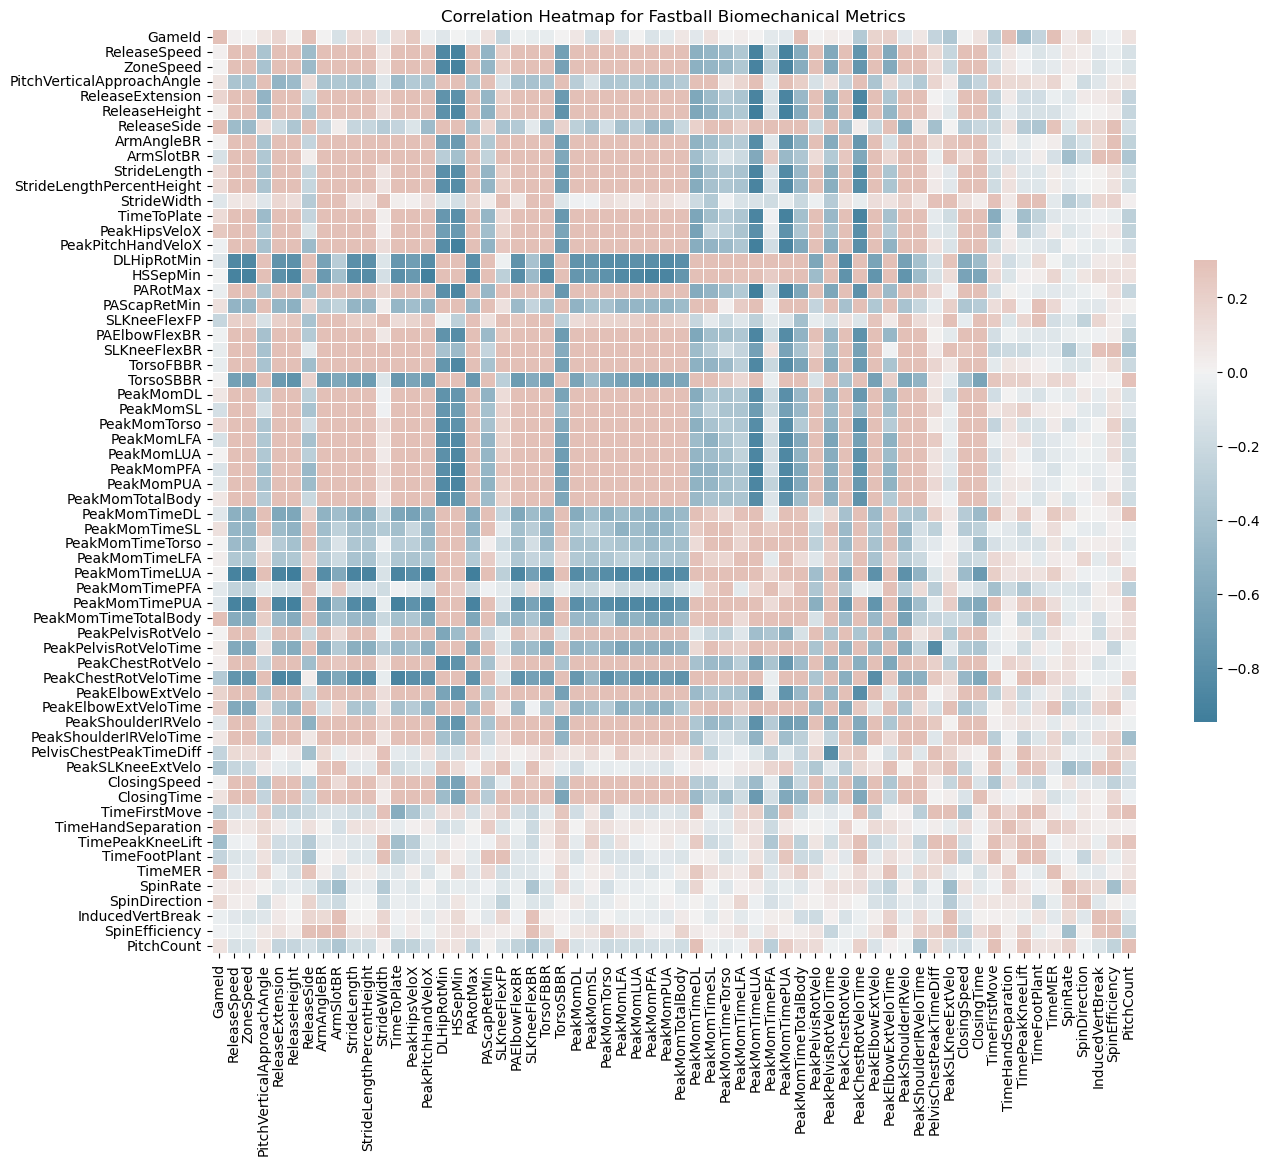

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = fastballs_only.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap for Fastball Biomechanical Metrics')
plt.show()


The heatmap displays the correlation coefficients between variables; warmer colors (red) indicate a positive correlation, and cooler colors (blue) indicate a negative correlation.

In [18]:
# Calculate the correlation of ReleaseSpeed with all other biomechanical metrics
fb_speed_correlations = fastballs_only.corrwith(fastballs_only['ReleaseSpeed']).sort_values(ascending=False)

# Filter out the correlation of ReleaseSpeed with itself
fb_speed_correlations = fb_speed_correlations[fb_speed_correlations.index != 'ReleaseSpeed']

# Display the biomechanical metrics with the highest positive and negative correlations with ReleaseSpeed
top_positive_correlations = fb_speed_correlations.head(10)
top_negative_correlations = fb_speed_correlations.tail(10)

In [19]:
top_positive_correlations

ZoneSpeed                    0.997159
PeakPitchHandVeloX           0.979360
PeakMomPUA                   0.970721
PeakMomPFA                   0.964231
PARotMax                     0.961746
ReleaseHeight                0.957822
PeakMomLUA                   0.947663
PeakMomLFA                   0.940280
StrideLengthPercentHeight    0.933956
StrideLength                 0.933956
dtype: float64

High positive correlations with ZoneSpeed and PeakPitchHandVeloX suggest that pitch velocity is strongly related to the speed of the ball in the strike zone and the velocity of the pitching hand.

In [20]:
top_negative_correlations

PeakMomTimeDL           -0.535995
PeakMomTimeTotalBody    -0.565243
PeakElbowExtVeloTime    -0.583295
PeakPelvisRotVeloTime   -0.588403
TorsoSBBR               -0.664833
PeakChestRotVeloTime    -0.757076
DLHipRotMin             -0.858573
PeakMomTimePUA          -0.902112
PeakMomTimeLUA          -0.903079
HSSepMin                -0.904797
dtype: float64

Negative correlations with times of peak velocities (PeakMomTimePUA, PeakMomTimeLUA) indicate that quicker times to peak moments are associated with lower release speeds. This could suggest that more efficient energy transfer is correlated with faster pitches.

The negative correlation with HSSepMin (Hip-Shoulder Separation Minimum) suggests that greater separation between hip and shoulder rotation might be linked to higher release speeds, which is consistent with pitching mechanics that emphasize the importance of hip-shoulder separation in generating velocity.

**Recommendations:**

These insights could be used to inform pitching coaching, focusing on optimizing the pitcher's mechanics to improve consistency and velocity. 

Further investigation into each of these metrics, perhaps including video analysis or a deeper dive into specific outings with high variance, would help to understand the causal relationships and how best to apply this knowledge in training.

**Additionally:**
Here's a predictive model to identify the primary factors contributing to the variance in fastball velocity.

In [26]:
null_counts = pitcher_data.isnull().sum()
null_counts = null_counts[null_counts > 0]
null_counts

ReleaseExtension      3
PeakMomDL             3
PeakMomTimeSL         3
PeakMomTimeTorso      3
TimeHandSeparation    3
PitchType             4
SpinEfficiency        5
dtype: int64

It seems that the dataset contains null values, which cannot be processed by the random forest algorithm. Before we can proceed with modeling, we must handle these NaN values. The typical approach is to either remove the rows with NaN values or to impute them with a statistical value such as the mean or median of the column.

Let's handle the NaN values by imputing them with the mean of each column

In [28]:
# Dropping non-numerical and target variable to prepare for feature set
X = fastballs_only.drop(columns=['GameId', 'Role', 'PitcherHandedness', 'Delivery', 'PitchType', 'ReleaseSpeed'])

# Target variable
y = fastballs_only['ReleaseSpeed']

import numpy as np
from sklearn.impute import SimpleImputer

# Imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Imputing NaN values in our feature set
X_imputed = imputer.fit_transform(X)

The mean is a common measure of central tendency, and unless the data is highly skewed, it's a reasonable choice for imputing missing values.
If the data is not highly skewed and there are not many outliers, the mean can provide a good estimate of the central tendency.
If the data is skewed or has outliers, the median will be a better choice for imputation.

In [29]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

Feature ranking:
1. feature ZoneSpeed (0.148875)
2. feature PeakChestRotVelo (0.115120)
3. feature PeakMomPUA (0.098192)
4. feature PeakMomSL (0.096742)
5. feature PeakMomTotalBody (0.047761)
6. feature PARotMax (0.039011)
7. feature ClosingSpeed (0.030082)
8. feature PeakMomTimeDL (0.029789)
9. feature PeakPitchHandVeloX (0.029548)
10. feature HSSepMin (0.029382)
11. feature PAElbowFlexBR (0.029208)
12. feature PeakMomPFA (0.028945)
13. feature PeakShoulderIRVelo (0.028868)
14. feature StrideLengthPercentHeight (0.020445)
15. feature PeakMomLUA (0.019729)
16. feature PeakMomLFA (0.019570)
17. feature TorsoFBBR (0.019426)
18. feature PeakPelvisRotVelo (0.019304)
19. feature PeakMomTorso (0.019128)
20. feature ReleaseSide (0.013485)
21. feature SLKneeFlexBR (0.011009)
22. feature TimeToPlate (0.010275)
23. feature ReleaseHeight (0.010165)
24. feature PeakMomTimePUA (0.010007)
25. feature PitchVerticalApproachAngle (0.009943)
26. feature PeakElbowExtVeloTime (0.009862)
27. feature Releas

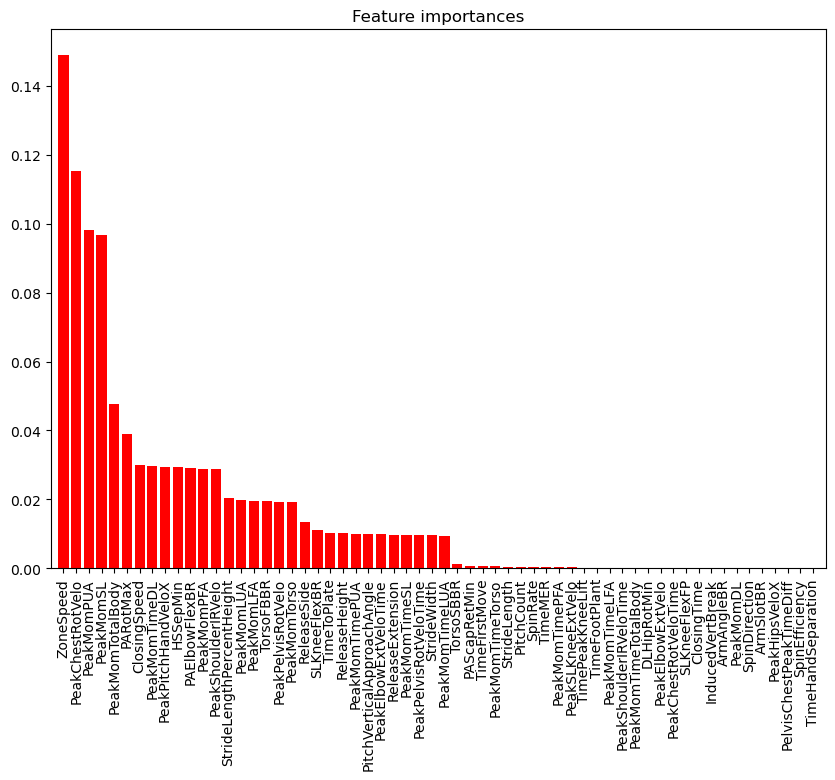

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets with imputed values
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initializing the RandomForestRegressor with imputed values
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Get feature importances
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], feature_importances[indices[f]]))

# Print mean squared error
print(f"\nMean Squared Error: {mse:.2f}")

# Plotting the feature importances of the forest
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Random Forest is less prone to overfitting than other algorithms because it takes the average of multiple decision trees to arrive at a prediction. It can model complex relationships between features and the target variable without assuming any linear structure. Random Forest provides a straightforward way to determine the importance of each feature in predicting the target variable, which is valuable for interpreting the model. It can handle a mix of continuous and categorical features and does not require scaling of data, although scaling can sometimes improve performance. It often performs well with minimal data preprocessing compared to other methods that require normalized or standardized data.

The predictive model has identified the primary factors contributing to the variance in fastball velocity, as indicated by the feature importances in the random forest model. 
Here are the top ten features:

ZoneSpeed: Most significant contributor to fastball velocity variance.

PeakChestRotVelo: Chest rotation velocity at peak.

PeakMomPUA: Peak momentum of the pitching upper arm.

PeakMomSL: Peak momentum of the stride leg.

PeakMomTotalBody: Peak total body momentum.

PARotMax: Maximum rotation of the pitching arm.

ClosingSpeed: Speed of the pitcher's body parts coming together at pitch release.

PeakMomTimeDL: Time to peak momentum of the drive leg.

PeakPitchHandVeloX: Peak velocity of the pitching hand in the X-direction.

HSSepMin: Minimum hip-shoulder separation.